In [1]:
import argparse
import treegp
import numpy as np
import pandas as pd
import pickle
from datetime import datetime
from sklearn.gaussian_process.kernels import Kernel
import os
import treecorr

# plotting things
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

In [2]:
s = 100
path = "~//psf//runsims//sameheightPsfws//outh_psfws_100.pkl"

kplist_dict = {psf_par: {'k': [], 'sigp': [], 'sigm': [],
                         'g1': [], 'g2': [], 'amp':[], 'resid':[]}
               for psf_par in ['e1', 'e2', 'sigma']}
kplist_dict['seed'] = [s]

# load data
d = pickle.load(open("..//runsims//sameheightPsfws//outh_psfws_100.pkl", 'rb'))
for k in ['e1', 'e2', 'thx', 'thy', 'sigma']:
    locals()[k] = np.array(d[k])
d_sigma = sigma - np.mean(sigma)
x = np.array([thx, thy]).T

r = 1
xs = []
param = d_sigma
paramC = []
for i in range(len(x)):
    if x[i][0]**2 + x[i][1]**2 < 1:
        xs.append(x[i])
        paramC.append(param[i])
xs = np.array(xs)
paramC = np.array(paramC)

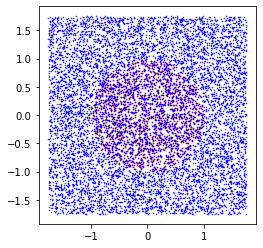

In [3]:
plt.scatter(np.array(xs)[:,0], np.array(xs)[:,1], s=0.2,c="r")
plt.scatter(thx,thy, s=0.2, c="b")
plt.gca().set_aspect('equal', adjustable='box')

In [214]:
pixel_squareroot = 17
npixels = pixel_squareroot**2
x = np.linspace(-.15, .15, pixel_squareroot)
x1, x2 = np.meshgrid(x, x)
coord = np.array([x1.reshape(npixels), x2.reshape(npixels)]).T